# [Test Technique 2] - @Elouan RAYMOND

## Consignes

L’objectif est de développer **un modèle performant** pour prédire la **variable Output** en fonction des **autres variables pertinentes**. La plupart des variables ont un nom décrivant l’information contenue.

 

**Quelques informations :**

* Les variables finissant en _M : variables calculées au mois M
* Les variables finissant en _MY : variables calculées au mois M-Y
* Les variables finissant en _XM : variables calculées sur les mois M-X au mois M 



# Sommaire

> Je vais présenter ici de façon succinte l'organisation que j'ai adopté pour mon analyse et le cheminement. 

**Progression**

[Lecture du fichier](#1.-Lecture-du-fichier-&-Reformattages)
<br>

* Il faut tout d'abord charger le jeu de données correctement et reformater certaines données donc la lecture aurait pu échouer.

[Premier exploration du dataset](#1.2---Répartition-des-données-et-outliers)
<br>

* Afficher les  variables du dataset, afin de voir si certaines données doivent être filtrés (outliers qui ne feraient pas sens notamment)

[Seconde Exploration du dataset](#2.-Analyse-des-données)

* [Donner du sens aux variables, analyser les corrélations](#2.1-Analyse-des-features-&-output) 
* [Analyser l'output et donner des pistes pour le modèle](#Analyse-de-[Output])
* [Signification d'output](#Signification-d'Output)

[Choix de la modélisation](#3.-Choix-de-la-modélisation)
* Choix des modèles 
* Choix des métriques 
* Objectifs


[Réduction du nombre de variables](#4.-Analyse-en-Composante-Principale)
* Réduire le nombre de variables afin de mener une analyse plus pertinente 
<br>


[$1^{er}$ modèle d'apprentissage supervisé](#5---Classification-avec-un-SVC-:-Support-Vector-Machine-Classifier)

* [Optimisation des hyperparamètres](#5.2.-Optimisation-des-hyperparamètres)
* [Calcul des métriques](#5.3.-Performance-du-modèle) 

[$2^{nd}$ modèle d'apprentissage supervisé](#6.-Classification-avec-un-Random-Forest)

* [Optimisation des hyperparamètres](#6.2.-Optimisation-des-hyperparamètres)
* [Calcul des métriques](#6.3.-Performance-du-modèle)

[Conclusion](#Conclusion)

* Retour sur l'objectif
* Choix du modèle

### Librairies pour l'analyse

In [535]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import math

%matplotlib inline

# 1. Lecture du fichier & Reformattages
## Chargement des données

In [536]:
df = pd.read_csv('Dataset_test_ILB.csv',encoding="latin1",sep=';',decimal=',')
# Encodage latin1 car le fichier n'est pas encodé en UTF8, selection de "," en séparateur décimal

## 1.1  Analyse du format

> L'objectif est de s'assurer ici que la lecture du fichier a été réussie et de reformater si necessaire certaines données.

In [537]:
df.head()

,ID,Nombres_adultes,Nombre_personnes_foyer,Age_2eme_personne,Note_credit,Encours_credit,ID_PP,Encours_credit_habitat,Montant_flux_crediteur_M1,Montant_obligations,...,Nombre_retrait_carte_M1,"Nombre_retrait_carte_M1,1",Quantité_obligations,Nombre_connexion_appli_6M,Nombre_de_connexion_appli_semaine_6M,Nombre_connexion_site_6M,Duree_connexion_moyenne_6M,Montant_flux_crediteur_M,Montant_pret_banque,Output
0,2911,2.057430,2.070880,91.042848,0.177448,"4715,49819",732f2de9240c404122f8c97b952c4cb8be8ede7f,2772.907651,9005.374276,5897.737602,...,0.160537,0.094456,262736.76140,46.683372,41.184480,48.057303,28.811906,5757.583993,124370.2918,FAUX
1,1398,2.060715,2.193722,90.715413,-0.062708,"6584,320922",1cc77d640ec2c383bef7099ff331d2ae962fd712,7094.588072,5047.824214,55655.446030,...,-0.172851,-0.170338,157962.64670,6.806368,9.210575,12.027955,-8.664351,2825.730247,130015.4600,FAUX
2,1793,1.930472,1.946847,90.588554,-0.094438,"-7792,256696",34d7809e534d6e7d83e1439cd4032201386fe9dd,-7613.883523,-692.852208,2277.193995,...,-0.037880,-0.086625,-26034.01144,3.442761,4.988904,7.072354,-21.135796,1679.601033,130904.7126,FAUX
3,1193,1.963631,1.916677,89.300012,-0.286729,"6118,791869",1539c6f04d9403928ef4e5b662490bd4787ad71d,5874.214001,1408.588664,8280.325647,...,0.994902,0.001148,336491.25330,-6.298359,-7.873857,-9.758806,-6.232009,4059.963478,123729.3778,FAUX
4,1342,2.009754,2.019892,87.706161,0.284325,"-4266,843489",27524f055875f70d102006ee6dcb360e982c4a69,-4459.202674,-889.296675,59977.521970,...,-0.027045,0.080714,-10631.26532,3.056277,4.414500,5.862660,-28.520162,1719.696619,126770.7544,FAUX


In [538]:
df.shape

(3015, 27)

In [539]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3015 entries, 0 to 3014
Data columns (total 27 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ID                                    3015 non-null   int64  
 1   Nombres_adultes                       3005 non-null   float64
 2   Nombre_personnes_foyer                3006 non-null   float64
 3   Age_2eme_personne                     3013 non-null   float64
 4   Note_credit                           3010 non-null   float64
 5   Encours_credit                        2993 non-null   object 
 6   ID_PP                                 3008 non-null   object 
 7   Encours_credit_habitat                3011 non-null   float64
 8   Montant_flux_crediteur_M1             3011 non-null   float64
 9   Montant_obligations                   3011 non-null   float64
 10  Montant_operation_crediteur_DAV_M1    3002 non-null   float64
 11  Montant_operation

### Problème de conversion sur Encours_credit
La majorité des colonnes qui contiennt des float ont bien été converties, sauf **Encours_credit**
> **Encours_credit**: Argent qui a été prêté mais qui n'a pas encore été remboursé.

### [Encours_credit]  - Reformattage

Nous allons donc reformater cette colonne de valeur afin de pouvoir mener des analyses

In [540]:
df.Encours_credit[14:34]

14    PAS DENCOURS
15    -4648,965858
16     9654,794858
17    -14351,44645
18    -1636,208879
19    -9442,465683
20    -8047,237148
21    -2059,018592
22     3981,916098
23     -2517,34467
24    -6878,210721
25     182,6623636
26    -5287,245058
27    -10360,55858
28      11300,4433
29    -3482,976268
30     10768,15036
31    -18316,31167
32     2641,386869
33             NaN
Name: Encours_credit, dtype: object

<br>
On comprend mieux pourquoi la conversion n'a pas pu se faire: il faut prendre en compte les personnes qui n'ont pas d'encours credit (PAS DENCOURS), ou pour lesquels on ne connaît pas l'information (NaN)

#### Formattage d'encours_credit

Pour que l'encours credit garde son sens, je propose de séparer cette colonne en deux colonnes : 

| Encours_credit_bool             | Encours_credit_value |
| ------------------------------- | -------------------- |
| 1 (True)                            | -1151                |
| 0 (False (Remplace 'PAS DENCOURS')) | NaN                  |



In [541]:
"""Création de deux array encours_credit_bool & encours_credit_value """
def create_encours_credit_bool_and_value(df):
    encours_credit = df['Encours_credit'].tolist()
    """Fonction qui construit les deux array évoqués ci-dessus"""
    encours_credit_bool = [1]*len(encours_credit)
    encours_credit_value =[np.nan]*len(encours_credit)
    for (i,encours) in enumerate(encours_credit): 
        """Parcourt la liste encours_credit : encours est un str pour le moment"""
        if encours =="PAS DENCOURS":
            encours_credit_bool[i] = 0
        else : 
            """Il y a bien un encours, il va falloir convertir le str en float : attention sep ',' """
            try :
                """Il se peut que encours soit un NaN c'est pourquoi on utilise try & except"""
                encours_float = '.'.join(encours.split(',')) # Utilisation de split pour la conversion
                encours_float = float(encours_float)
                encours_credit_value[i] = encours_float
            except : 
                encours_credit_bool[i] = np.nan
                
    """On peut renvoyer les array"""
    return(encours_credit_bool,encours_credit_value)

In [542]:
encours_credit_bool,encours_credit_values = create_encours_credit_bool_and_value(df)

**On vérifie si la structure est conforme à ce que nous avions envisagé**

In [543]:
encours = pd.DataFrame(zip(encours_credit_bool,encours_credit_values),columns=['Encours_credit_bool','Encours_credit_value'])

In [544]:
encours.iloc[13:34,:]
## Le reformattage a bien fonctionné

,Encours_credit_bool,Encours_credit_value
13,1.0,5286.493638
14,0.0,NaN
15,1.0,-4648.965858
16,1.0,9654.794858
17,1.0,-14351.446450
18,1.0,-1636.208879
19,1.0,-9442.465683
20,1.0,-8047.237148
21,1.0,-2059.018592
22,1.0,3981.916098


### Modification d'encours credit dans le dataframe

In [545]:
df1 = df.copy()

On va insérer notre notre dataframe encours à la place de 'Encours_credit'

In [546]:
df1.iloc[:2,:5]

,ID,Nombres_adultes,Nombre_personnes_foyer,Age_2eme_personne,Note_credit
0,2911,2.057430,2.070880,91.042848,0.177448
1,1398,2.060715,2.193722,90.715413,-0.062708


In [547]:
encours.head(2)

,Encours_credit_bool,Encours_credit_value
0,1.0,4715.498190
1,1.0,6584.320922


In [548]:
df1.iloc[:2,6:]

,ID_PP,Encours_credit_habitat,Montant_flux_crediteur_M1,Montant_obligations,Montant_operation_crediteur_DAV_M1,Montant_operation_crediteur_DAV_M,Montant_operation_debiteur_DAV_M1,Montant_operation_debiteur_DAV_M,Montant_retrait_carte_M,Montant_retrait_carte_M1,...,Nombre_retrait_carte_M1,"Nombre_retrait_carte_M1,1",Quantité_obligations,Nombre_connexion_appli_6M,Nombre_de_connexion_appli_semaine_6M,Nombre_connexion_site_6M,Duree_connexion_moyenne_6M,Montant_flux_crediteur_M,Montant_pret_banque,Output
0,732f2de9240c404122f8c97b952c4cb8be8ede7f,2772.907651,9005.374276,5897.737602,4498.397638,7930.203493,4997.109487,9488.923224,31.338746,25.008051,...,0.160537,0.094456,262736.7614,46.683372,41.184480,48.057303,28.811906,5757.583993,124370.2918,FAUX
1,1cc77d640ec2c383bef7099ff331d2ae962fd712,7094.588072,5047.824214,55655.446030,1890.630239,-1655.250533,1669.661800,1494.971252,-0.191790,-3.399387,...,-0.172851,-0.170338,157962.6467,6.806368,9.210575,12.027955,-8.664351,2825.730247,130015.4600,FAUX


In [549]:
def concat_df_encours(df,encours):
    """On sépare df en deux parties, encours_credit étant la 6 colonne de df"""
    part1 = df.iloc[:,:5]
    part2 = df.iloc[:,6:]
    df1 = pd.concat([part1,encours],axis=1)
    df1 = pd.concat([df1,part2],axis=1)
    return(df1)

In [550]:
df1 = concat_df_encours(df,encours)

In [551]:
df1.head()

,ID,Nombres_adultes,Nombre_personnes_foyer,Age_2eme_personne,Note_credit,Encours_credit_bool,Encours_credit_value,ID_PP,Encours_credit_habitat,Montant_flux_crediteur_M1,...,Nombre_retrait_carte_M1,"Nombre_retrait_carte_M1,1",Quantité_obligations,Nombre_connexion_appli_6M,Nombre_de_connexion_appli_semaine_6M,Nombre_connexion_site_6M,Duree_connexion_moyenne_6M,Montant_flux_crediteur_M,Montant_pret_banque,Output
0,2911,2.057430,2.070880,91.042848,0.177448,1.0,4715.498190,732f2de9240c404122f8c97b952c4cb8be8ede7f,2772.907651,9005.374276,...,0.160537,0.094456,262736.76140,46.683372,41.184480,48.057303,28.811906,5757.583993,124370.2918,FAUX
1,1398,2.060715,2.193722,90.715413,-0.062708,1.0,6584.320922,1cc77d640ec2c383bef7099ff331d2ae962fd712,7094.588072,5047.824214,...,-0.172851,-0.170338,157962.64670,6.806368,9.210575,12.027955,-8.664351,2825.730247,130015.4600,FAUX
2,1793,1.930472,1.946847,90.588554,-0.094438,1.0,-7792.256696,34d7809e534d6e7d83e1439cd4032201386fe9dd,-7613.883523,-692.852208,...,-0.037880,-0.086625,-26034.01144,3.442761,4.988904,7.072354,-21.135796,1679.601033,130904.7126,FAUX
3,1193,1.963631,1.916677,89.300012,-0.286729,1.0,6118.791869,1539c6f04d9403928ef4e5b662490bd4787ad71d,5874.214001,1408.588664,...,0.994902,0.001148,336491.25330,-6.298359,-7.873857,-9.758806,-6.232009,4059.963478,123729.3778,FAUX
4,1342,2.009754,2.019892,87.706161,0.284325,1.0,-4266.843489,27524f055875f70d102006ee6dcb360e982c4a69,-4459.202674,-889.296675,...,-0.027045,0.080714,-10631.26532,3.056277,4.414500,5.862660,-28.520162,1719.696619,126770.7544,FAUX


**[Modification de encours credit]**
> A l'issue de cette première partie nous avons pu retravailler le dataframe et notamment la colonne "Encours_credit" afin de simplifier l'analyse

## 1.2 - Répartition des données et outliers

##### Maintenant que nous avons pu charger correctement le datasets, il faut regarder s'il y a des anomalies dans le jeu de données

In [552]:
df = df1
df.describe()

,ID,Nombres_adultes,Nombre_personnes_foyer,Age_2eme_personne,Note_credit,Encours_credit_bool,Encours_credit_value,Encours_credit_habitat,Montant_flux_crediteur_M1,Montant_obligations,...,Montant_retrait_carte_M1,Nombre_retrait_carte_M1,"Nombre_retrait_carte_M1,1",Quantité_obligations,Nombre_connexion_appli_6M,Nombre_de_connexion_appli_semaine_6M,Nombre_connexion_site_6M,Duree_connexion_moyenne_6M,Montant_flux_crediteur_M,Montant_pret_banque
count,3015.000000,3005.000000,3006.000000,3.013000e+03,3010.000000,2993.000000,2970.000000,3011.000000,3011.000000,3.011000e+03,...,3008.000000,3011.000000,3010.000000,3.009000e+03,2994.000000,2994.000000,2996.000000,3006.000000,3009.000000,3008.00000
mean,1505.492206,1.651430,2.139211,2.247984e+03,4.087619,0.992315,67733.356217,66183.088854,3430.032454,1.057915e+04,...,25.181340,0.141723,0.150699,1.941102e+05,21.343223,26.634469,33.320717,102.902545,4069.769709,129798.31574
std,869.645684,3.073339,1.130802,7.714272e+04,3.901568,0.087339,97274.363255,97054.712799,12601.220620,3.639671e+04,...,127.211080,0.815417,0.976184,2.198428e+06,42.840104,57.345026,74.547646,151.341643,17200.093454,50784.99592
min,0.000000,-45.154000,0.628834,-1.014041e+01,-1.243272,0.000000,-35268.964050,-35446.980780,-12073.545780,-1.111274e+04,...,-61.640257,-0.276593,-0.287192,-5.665139e+05,-12.976680,-15.128918,-19.493009,-43.124721,-5509.113441,-12165.56655
25%,752.500000,1.023015,1.099215,1.193945e+00,0.060387,1.000000,-49.319006,-1058.635777,-355.231937,1.663585e+02,...,-8.283941,-0.045147,-0.050422,-4.443938e+04,0.940546,1.122001,1.411483,7.331611,494.447401,124794.80720
50%,1506.000000,1.958080,1.979002,3.295269e+01,6.071823,1.000000,15300.678100,12956.683190,2173.796979,4.705268e+03,...,1.666568,0.010977,0.006696,7.685730e+04,6.721483,8.460031,10.834154,57.338650,1963.882364,129489.98350
75%,2259.500000,2.011098,2.634577,4.842538e+01,6.646759,1.000000,122237.835025,121627.982600,5120.094253,9.941821e+03,...,12.740980,0.066336,0.073643,2.001135e+05,23.635741,29.717792,36.966530,150.928176,3801.005236,134389.96840
max,2999.000000,157.000000,8.029462,3.651695e+06,14.147356,1.000000,779946.571100,779588.699300,397248.044000,1.003670e+06,...,2406.320620,17.061262,23.098115,1.001995e+08,786.034686,1271.847271,1731.175163,2085.949319,367964.823600,722428.89020


#### Analyse skewnesss & kurtosis

Le but est d'analyser la répartition et la symétrie des données pour voir si il y a des outliers

In [553]:
df.skew()
#df.kurtosis()

ID                                      -0.003092
Nombres_adultes                         41.276719
Nombre_personnes_foyer                   1.183082
Age_2eme_personne                       40.209588
Note_credit                              0.346819
Encours_credit_bool                    -11.281211
Encours_credit_value                     1.749415
Encours_credit_habitat                   1.735483
Montant_flux_crediteur_M1               18.673586
Montant_obligations                     12.031500
Montant_operation_crediteur_DAV_M1       9.193942
Montant_operation_crediteur_DAV_M       10.888899
Montant_operation_debiteur_DAV_M1        9.139366
Montant_operation_debiteur_DAV_M         6.699842
Montant_retrait_carte_M                  6.679253
Montant_retrait_carte_M1                 7.778168
Nombre_retrait_carte_M1                 12.031966
Nombre_retrait_carte_M1,1               14.905489
Quantité_obligations                    36.016058
Nombre_connexion_appli_6M                6.132051


**Afin de se familiariser avec le dataset nous allons afficher chacune des composantes**

In [554]:
def plot_skew_kurt(df):
    subplot_pos =[121,122] ## Subplot 2 par ligne
    legends =['',''] # Pour stocker la legende de chaque plot de la ligne
    for (i,cols) in enumerate(df.skew().index[1:]):
        ## Selection de toutes les features sauf ID
        plt.subplot(subplot_pos[i%2])
        legend = f'{cols} - sk : {round(df.skew().values[i+1])} - kurt :{round(df.kurtosis().values[i+1])}'
        legends[i%2] = legend 
        plt.scatter(df.index,df[cols])
        if i%2==0: ## Fin de ligne on affiche
            print('  | '.join(legends))
            plt.subplots_adjust(right = 2)
            plt.show()

Nombres_adultes - sk : 41.0 - kurt :2199.0  | 


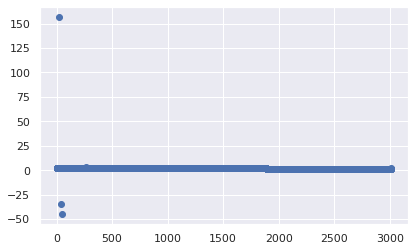

Age_2eme_personne - sk : 40.0 - kurt :1762.0  | Nombre_personnes_foyer - sk : 1.0 - kurt :1.0


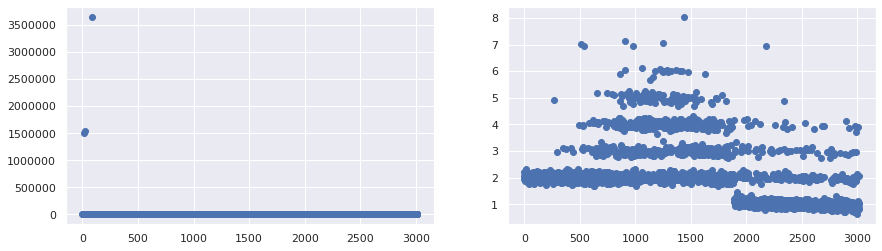

Encours_credit_bool - sk : -11.0 - kurt :125.0  | Note_credit - sk : 0.0 - kurt :-1.0


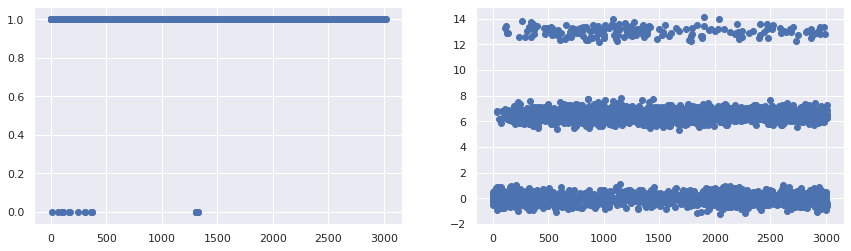

Encours_credit_habitat - sk : 2.0 - kurt :4.0  | Encours_credit_value - sk : 2.0 - kurt :4.0


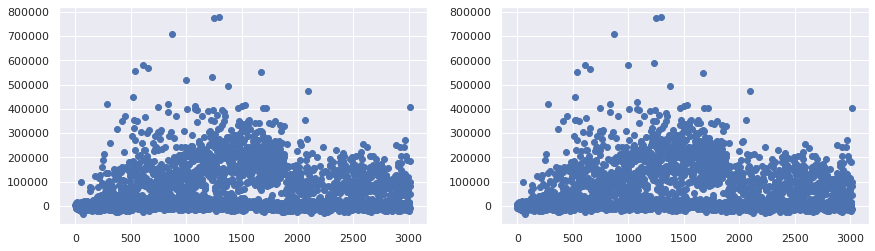

Montant_obligations - sk : 12.0 - kurt :236.0  | Montant_flux_crediteur_M1 - sk : 19.0 - kurt :483.0


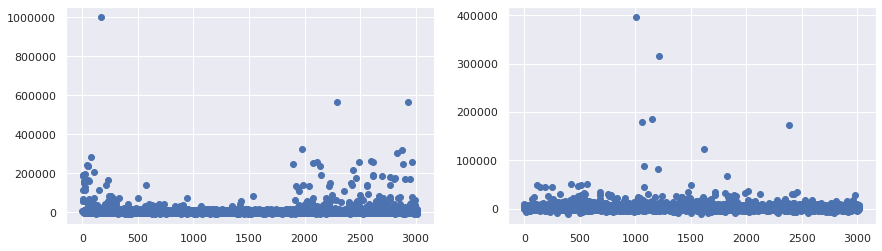

Montant_operation_crediteur_DAV_M - sk : 11.0 - kurt :170.0  | Montant_operation_crediteur_DAV_M1 - sk : 9.0 - kurt :97.0


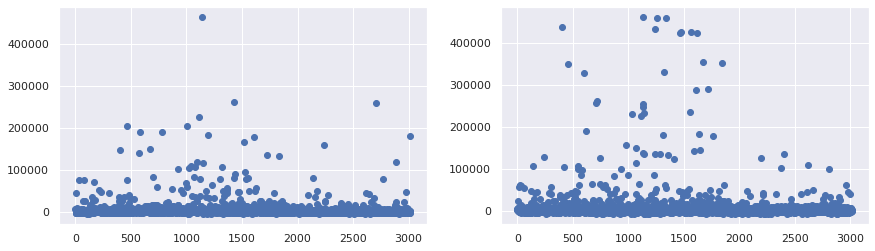

Montant_operation_debiteur_DAV_M - sk : 7.0 - kurt :52.0  | Montant_operation_debiteur_DAV_M1 - sk : 9.0 - kurt :95.0


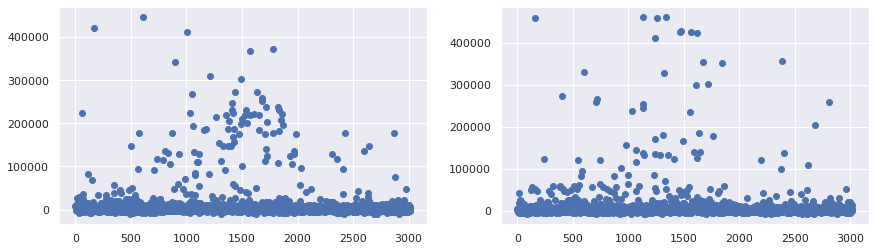

Montant_retrait_carte_M1 - sk : 8.0 - kurt :83.0  | Montant_retrait_carte_M - sk : 7.0 - kurt :53.0


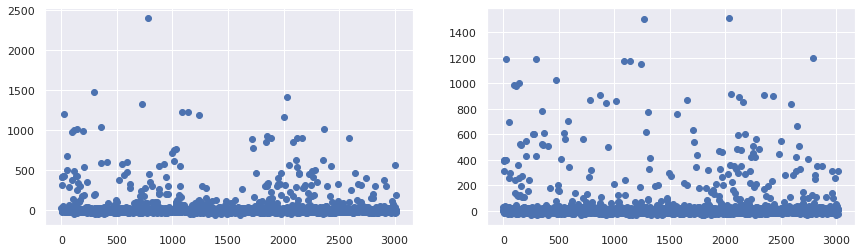

Nombre_retrait_carte_M1,1 - sk : 15.0 - kurt :293.0  | Nombre_retrait_carte_M1 - sk : 12.0 - kurt :201.0


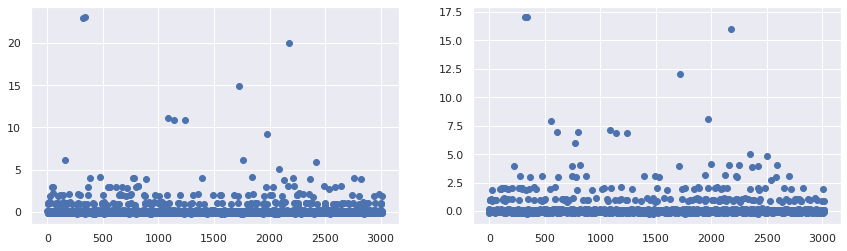

Nombre_connexion_appli_6M - sk : 6.0 - kurt :76.0  | Quantité_obligations - sk : 36.0 - kurt :1508.0


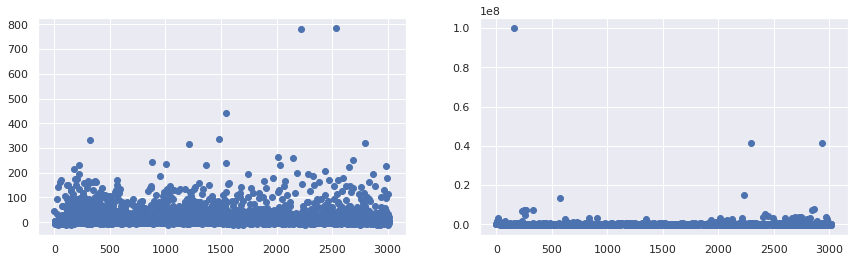

Nombre_connexion_site_6M - sk : 10.0 - kurt :184.0  | Nombre_de_connexion_appli_semaine_6M - sk : 9.0 - kurt :154.0


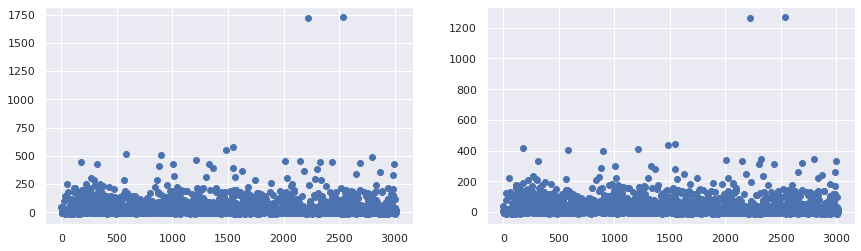

Montant_flux_crediteur_M - sk : 16.0 - kurt :287.0  | Duree_connexion_moyenne_6M - sk : 4.0 - kurt :31.0


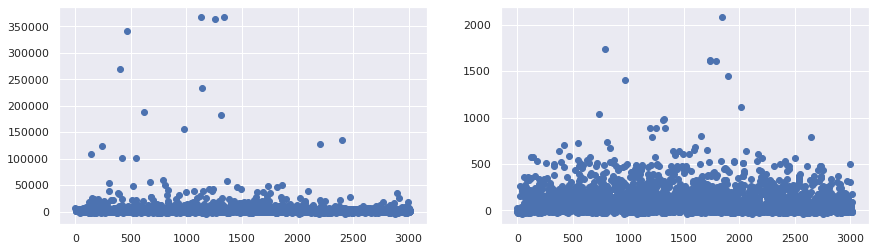

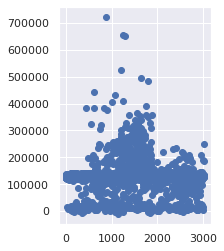

In [555]:
plot_skew_kurt(df) # Scatter plot de la variable & affichage sa skewness et de son kurtosis

### Enlever les outliers
On remarque **3 features** ont un **kurtosis & une skewness très élevé** - le plot confirme la présence d'**outliers**:

**Pour ces deux features, ils est nécessaire de se séparer de tous les outliers, car elles n'ont pas de sens, par exemple : max(Nombres_adultes) = 157, ce qui ne fait pas sens.**

* Nombres_adultes
* Age_2e_personne

**Pour cette feature, on va uniquement enlever le maximum (1 000 000)**
* Quantités_obligations

### Filtrer les outliers

In [556]:
"""Avec les paramètres suivants on peut : 
Enlever les outliers pour Nombres_adultes  >25 ou <0 (pas de nombre_adultes négatif)
Enlever les outliers au niveau de l'âge : >200
Quantité d'obligations : On enlève le max qui déforme le dataset et est beaucoup trop éloigné des autres valeurs
"""

outliers_filters = (df.Nombres_adultes>25)|(df.Nombres_adultes<0)|(df.Age_2eme_personne>200)|(df.Quantité_obligations==max(df.Quantité_obligations))

In [557]:
"""Voici les données que nous allons enlever du dataset"""
df[outliers_filters]

,ID,Nombres_adultes,Nombre_personnes_foyer,Age_2eme_personne,Note_credit,Encours_credit_bool,Encours_credit_value,ID_PP,Encours_credit_habitat,Montant_flux_crediteur_M1,...,Nombre_retrait_carte_M1,"Nombre_retrait_carte_M1,1",Quantité_obligations,Nombre_connexion_appli_6M,Nombre_de_connexion_appli_semaine_6M,Nombre_connexion_site_6M,Duree_connexion_moyenne_6M,Montant_flux_crediteur_M,Montant_pret_banque,Output
13,1125,1.988612,1.996277,1.500000e+06,0.468081,1.0,5286.493638,dc5c0440a9a7fa6e56ef9c41ec30044dfc6aafe2,3887.092790,-728.100980,...,1.030981,1.119442,1.315948e+06,-1.117414,-0.988967,-0.885137,-21.857154,3629.066274,123788.7548,FAUX
20,2436,157.000000,2.207566,8.286753e+01,0.124294,1.0,-8047.237148,b9da2f10fa9da8a341c9270d22825508bb01c3aa,-7553.047311,2303.188415,...,0.028504,0.012999,-6.527436e+04,-6.175580,-5.440543,-6.487811,3.370448,1632.176481,129916.1813,VRAI
23,30,1.998692,1.870891,1.534521e+06,-0.327990,1.0,-2517.344670,c368cc66aff85ee21a1a90964c611b23d15a2e12,-2604.063097,2827.502265,...,-0.009947,-0.028837,1.891141e+06,93.231513,80.120497,100.353803,268.078651,4517.537171,136168.2920,FAUX
38,2763,-35.000000,1.833692,7.956678e+01,0.164459,1.0,-9726.573835,ddbf56d6a375013d611d93a608c862af27f376d0,-10332.358050,-795.964305,...,-0.039791,-0.034498,9.370660e+04,2.489446,0.090541,-0.143907,-13.595050,1542.499101,129448.9522,FAUX
45,2311,-45.154000,1.980447,7.860640e+01,-0.224071,1.0,-1361.812353,00c496dc805e6d74d21b803aaf0d5b3334faa349,-1421.340490,653.830813,...,0.934992,2.930379,7.564783e+04,3.631247,4.646773,4.737960,17.970802,4789.286357,135816.6949,FAUX
90,390,1.927201,1.774959,3.651695e+06,-0.462633,1.0,-4117.758621,01e45b8e536995696fd685d6e1f49bfc819168d4,-3146.248259,-1242.853205,...,0.107656,0.052591,1.136401e+05,29.385684,28.240021,31.809899,-18.751434,1116.904916,129835.9530,FAUX
164,808,2.037934,1.984801,6.773047e+01,-0.120481,1.0,-3012.301219,aca550f13c3627508b776a1b5a8a8876e65b04d7,-2753.502799,8897.974922,...,0.019288,0.008760,1.001995e+08,89.816645,80.038331,112.270599,374.607394,22950.805510,113190.3472,VRAI


In [558]:
outliers_index = df[outliers_filters].index #On garde les index des outliers

In [559]:
df1 = df.copy()

In [560]:
df1 = df[~df.index.isin(outliers_index)].reset_index(drop=True) # On met les outliers de côtés

### Après avoir filtré les outliers -  Nouvelle analyse skew & kurtosis

In [561]:
df1.shape

(3008, 28)

In [562]:
df.shape

(3015, 28)

In [563]:
df1.describe()

,ID,Nombres_adultes,Nombre_personnes_foyer,Age_2eme_personne,Note_credit,Encours_credit_bool,Encours_credit_value,Encours_credit_habitat,Montant_flux_crediteur_M1,Montant_obligations,...,Montant_retrait_carte_M1,Nombre_retrait_carte_M1,"Nombre_retrait_carte_M1,1",Quantité_obligations,Nombre_connexion_appli_6M,Nombre_de_connexion_appli_semaine_6M,Nombre_connexion_site_6M,Duree_connexion_moyenne_6M,Montant_flux_crediteur_M,Montant_pret_banque
count,3008.000000,2998.000000,2999.000000,3006.000000,3003.000000,2986.000000,2963.000000,3004.000000,3004.000000,3004.000000,...,3001.000000,3004.000000,3003.000000,3.002000e+03,2987.000000,2987.000000,2989.000000,2999.000000,3002.000000,3001.000000
mean,1505.716755,1.627001,2.139653,28.825561,4.097274,0.992297,67901.304252,66345.274303,3434.058636,10129.304273,...,25.102147,0.141363,0.149698,1.600444e+05,21.322513,26.634380,33.317904,102.939389,4065.875676,129801.788927
std,869.290959,0.484844,1.132066,24.892164,3.900953,0.087441,97327.508262,97109.294226,12614.628178,31365.482404,...,127.143296,0.816060,0.975823,1.228497e+06,42.843987,57.386837,74.600335,151.339618,17216.479346,50842.935701
min,0.000000,0.869316,0.628834,-10.140412,-1.243272,0.000000,-35268.964050,-35446.980780,-12073.545780,-11112.742260,...,-61.640257,-0.276593,-0.287192,-5.665139e+05,-12.976680,-15.128918,-19.493009,-43.124721,-5509.113441,-12165.566550
25%,752.750000,1.023053,1.098764,1.184886,0.061701,1.000000,61.072253,-909.148867,-352.258920,160.153010,...,-8.255494,-0.045272,-0.050706,-4.461642e+04,0.941826,1.125489,1.417528,7.422034,491.620936,124798.290300
50%,1506.500000,1.958061,1.978972,32.919935,6.073068,1.000000,15415.914820,13019.576045,2175.508736,4688.742024,...,1.667738,0.010836,0.006588,7.683218e+04,6.726718,8.460611,10.838098,57.417767,1963.766421,129486.913900
75%,2258.250000,2.011032,2.744282,48.332106,6.651442,1.000000,122706.730700,121855.129975,5122.783487,9931.201318,...,12.734430,0.066320,0.073626,1.997422e+05,23.594110,29.699475,36.884775,150.901409,3796.772909,134389.615800
max,2999.000000,3.006550,8.029462,91.042848,14.147356,1.000000,779946.571100,779588.699300,397248.044000,565896.779800,...,2406.320620,17.061262,23.098115,4.163348e+07,786.034686,1271.847271,1731.175163,2085.949319,367964.823600,722428.890200


In [564]:
df1.skew()

ID                                      -0.003028
Nombres_adultes                         -0.505495
Nombre_personnes_foyer                   1.180729
Age_2eme_personne                        0.112854
Note_credit                              0.343199
Encours_credit_bool                    -11.267715
Encours_credit_value                     1.746434
Encours_credit_habitat                   1.732454
Montant_flux_crediteur_M1               18.656586
Montant_obligations                      8.234687
Montant_operation_crediteur_DAV_M1       9.188814
Montant_operation_crediteur_DAV_M       10.934636
Montant_operation_debiteur_DAV_M1        9.183713
Montant_operation_debiteur_DAV_M         6.607157
Montant_retrait_carte_M                  6.697234
Montant_retrait_carte_M1                 7.800375
Nombre_retrait_carte_M1                 12.032151
Nombre_retrait_carte_M1,1               14.951891
Quantité_obligations                    27.089111
Nombre_connexion_appli_6M                6.143452


Nombres_adultes - sk : -1.0 - kurt :-2.0  | 


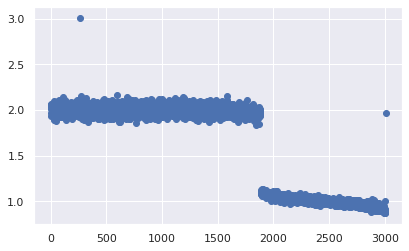

Age_2eme_personne - sk : 0.0 - kurt :-1.0  | Nombre_personnes_foyer - sk : 1.0 - kurt :1.0


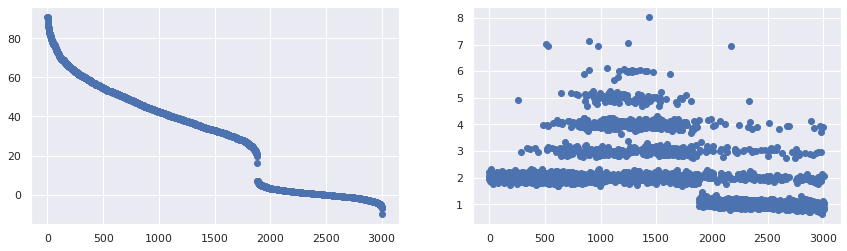

Encours_credit_bool - sk : -11.0 - kurt :125.0  | Note_credit - sk : 0.0 - kurt :-1.0


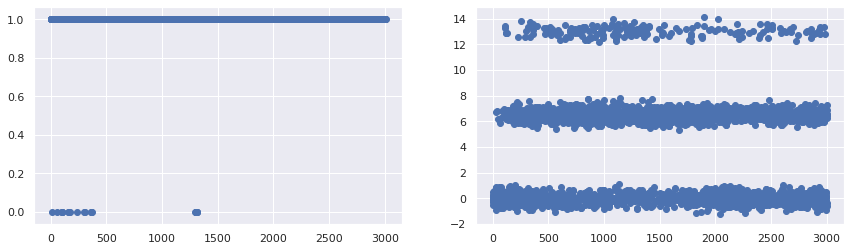

Encours_credit_habitat - sk : 2.0 - kurt :4.0  | Encours_credit_value - sk : 2.0 - kurt :4.0


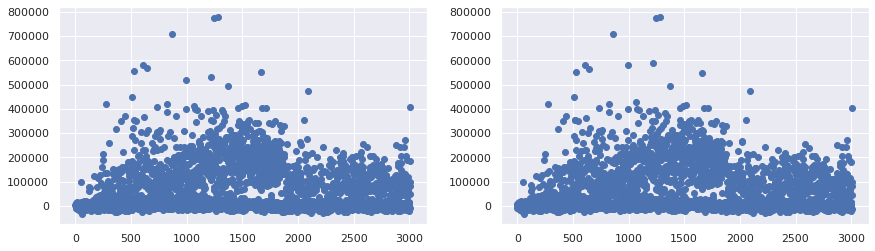

Montant_obligations - sk : 8.0 - kurt :95.0  | Montant_flux_crediteur_M1 - sk : 19.0 - kurt :482.0


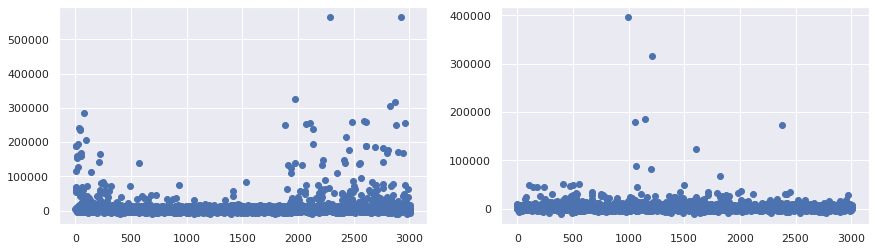

Montant_operation_crediteur_DAV_M - sk : 11.0 - kurt :172.0  | Montant_operation_crediteur_DAV_M1 - sk : 9.0 - kurt :97.0


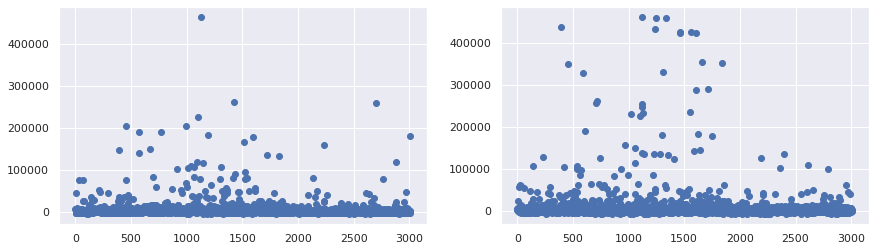

Montant_operation_debiteur_DAV_M - sk : 7.0 - kurt :51.0  | Montant_operation_debiteur_DAV_M1 - sk : 9.0 - kurt :97.0


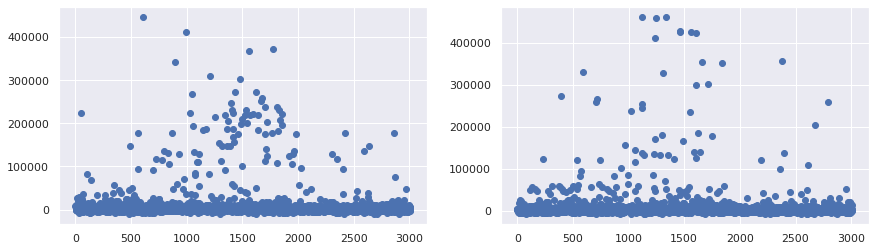

Montant_retrait_carte_M1 - sk : 8.0 - kurt :83.0  | Montant_retrait_carte_M - sk : 7.0 - kurt :53.0


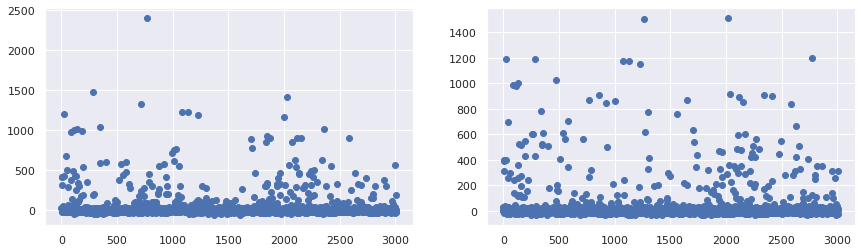

Nombre_retrait_carte_M1,1 - sk : 15.0 - kurt :294.0  | Nombre_retrait_carte_M1 - sk : 12.0 - kurt :201.0


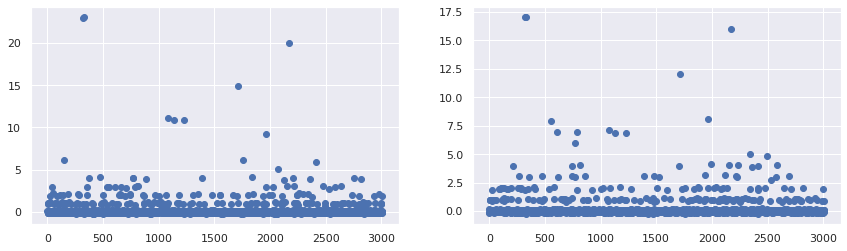

Nombre_connexion_appli_6M - sk : 6.0 - kurt :76.0  | Quantité_obligations - sk : 27.0 - kurt :873.0


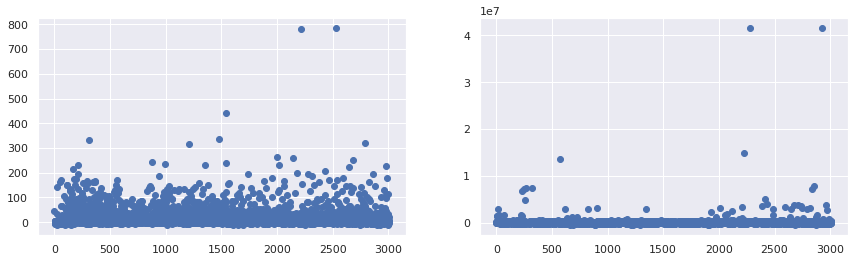

Nombre_connexion_site_6M - sk : 10.0 - kurt :184.0  | Nombre_de_connexion_appli_semaine_6M - sk : 9.0 - kurt :154.0


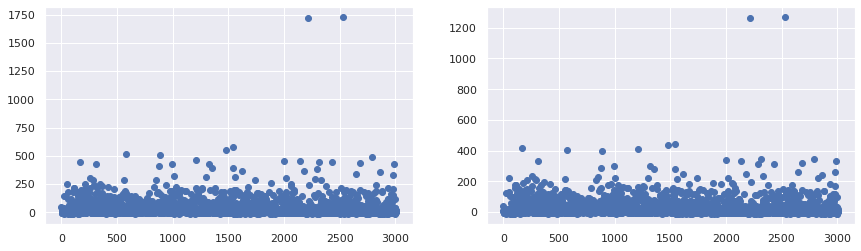

Montant_flux_crediteur_M - sk : 16.0 - kurt :287.0  | Duree_connexion_moyenne_6M - sk : 4.0 - kurt :31.0


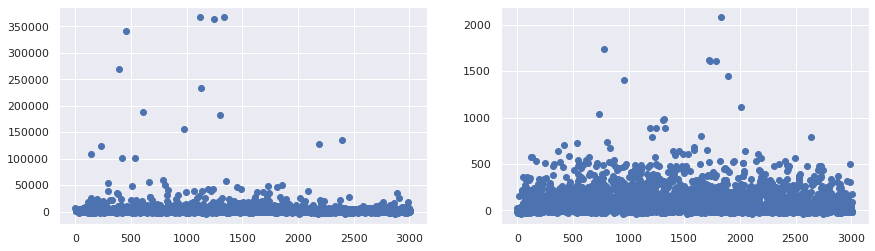

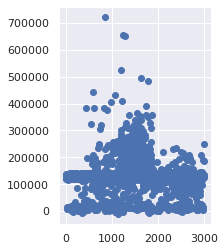

In [565]:
plot_skew_kurt(df1)

**Nous obtenons des résultats beaucoup plus cohérent pour les variables auxquelles ont enlevés les outliers** <br> 



### Quelques remarques sur le dataset

**Concernant nombres_adultes & age_2eme_personne :**

On peut remarquer 2 profils :

* Nb Adultes = 2 & Age_2eme personne $\in$ [20:80] :
    * Couple
* Nb Adultes = 1 & Age_2eme personne $\in$ [0:10] :
    * Famille monoparentale

  

## 1.3 - Encodage CSP

Il nous reste maintenant à encoder la colonne CSP, qui nous indique si la catégorie socio-professionelle des personnes étudiés. 
* CSP+ : Cat Socio Professionelle "Supérieure"
* CSP-: Cat Socio Professionelle "Inférieure"

In [566]:
df1.CSP[:5]

0    CSP+
1    CSP-
2    CSP+
3    CSP-
4    CSP+
Name: CSP, dtype: object

Pour ce faire nous allons renommer la colonne CSP -> CSP+ : 

* 1 - Si CSP +
* 0 - Si CSP -

In [567]:
csp_dict = {'CSP+':1,'CSP-':0,np.nan:np.nan} # Utilisation d'un dictionnaire pour un encodage rapide

df1['CSP'] = [csp_dict[csp_i]  for csp_i in df1['CSP']]

## 1.4 - Transformation Output

Comme nous avons pu le voir, output est un booléen en français qu'il faut donc transformer en anglais : 

* VRAI -> TRUE
* FAUX -> FALSE

In [568]:
df1.Output[:5]

0    FAUX
1    FAUX
2    FAUX
3    FAUX
4    FAUX
Name: Output, dtype: object

In [569]:
output_dict = {'FAUX':False,'VRAI':True,np.nan:np.nan}

In [570]:
df1['Output'] = [output_dict[output] for output in df1['Output']]

# 2. Analyse des données

Maintenant que nous avons chargés le dataset et reformaté les données qui se devaient d'être reformatées, nous allons pouvoir regarder : 
* Les features, valeurs, répartitions
* Output, répartitions

## 2.1 Analyse des features & output

In [571]:
df = df1.copy() # On sauvegarde sur df les changements réalisés précedemment

### Analyse des features

In [572]:
df.columns

Index(['ID', 'Nombres_adultes', 'Nombre_personnes_foyer', 'Age_2eme_personne',
       'Note_credit', 'Encours_credit_bool', 'Encours_credit_value', 'ID_PP',
       'Encours_credit_habitat', 'Montant_flux_crediteur_M1',
       'Montant_obligations', 'Montant_operation_crediteur_DAV_M1',
       'Montant_operation_crediteur_DAV_M',
       'Montant_operation_debiteur_DAV_M1', 'Montant_operation_debiteur_DAV_M',
       'Montant_retrait_carte_M', 'Montant_retrait_carte_M1', 'CSP',
       'Nombre_retrait_carte_M1', 'Nombre_retrait_carte_M1,1',
       'Quantité_obligations', 'Nombre_connexion_appli_6M',
       'Nombre_de_connexion_appli_semaine_6M', 'Nombre_connexion_site_6M',
       'Duree_connexion_moyenne_6M', 'Montant_flux_crediteur_M',
       'Montant_pret_banque', 'Output'],
      dtype='object')

### Des "catégories dans les features" :

> On remarque que l'on peut classer les features selon leurs appartenances aux catégories suivantes

| Catégories | Informations globales <br> (Informations concernant la personne, age, nbr adultes, montant du crédit, crédit restant) | Opérations bancaires <br> (Ensemble des opérations effectuées sur le mois) | Extra financiers <br> (Informations sur le comportement de la personne, suivi de ses opérations bancaire) |
| ---------- | ------------------------------------------------------------ | ------------------------------------------------------------ | ------------------------------------------------------------ |
| Features   | Nombre_adultes \| Nombre_personnes_foyer <br> Age_2e_personne \| Note_credit \| Montant_pret_banque <br> CSP ; Encours | Montant_operation_crediteur/debiteur <br> Nombre de retraits <br> Montant_flux_créditeur | Nombre_connexion_appli <br> Nombre_connexion_site <br> Durée de connexion moyenne |

**En regroupant selon ses catégories, l'analyse de corrélation sera plus pertinente**

In [573]:
### On construit ces catégories en accord avec le tableau ci-dessus
infos_globales_cols = ['Nombres_adultes', 'CSP','Nombre_personnes_foyer', 'Age_2eme_personne',
       'Note_credit', 'Encours_credit_bool', 'Encours_credit_value',
       'Encours_credit_habitat','Montant_pret_banque']
operations_bancaires_cols = ['Montant_flux_crediteur_M1',
       'Montant_obligations', 'Montant_operation_crediteur_DAV_M1',
       'Montant_operation_crediteur_DAV_M',
       'Montant_operation_debiteur_DAV_M1', 'Montant_operation_debiteur_DAV_M',
       'Montant_retrait_carte_M', 'Montant_retrait_carte_M1',
       'Nombre_retrait_carte_M1', 'Nombre_retrait_carte_M1,1','Montant_flux_crediteur_M','Quantité_obligations']
extra_financiers_cols = ['Nombre_connexion_appli_6M',
       'Nombre_de_connexion_appli_semaine_6M', 'Nombre_connexion_site_6M',
       'Duree_connexion_moyenne_6M']
"""Reorganisation des features_cols"""
features_cols = infos_globales_cols+operations_bancaires_cols+extra_financiers_cols

In [574]:
features = df[features_cols]

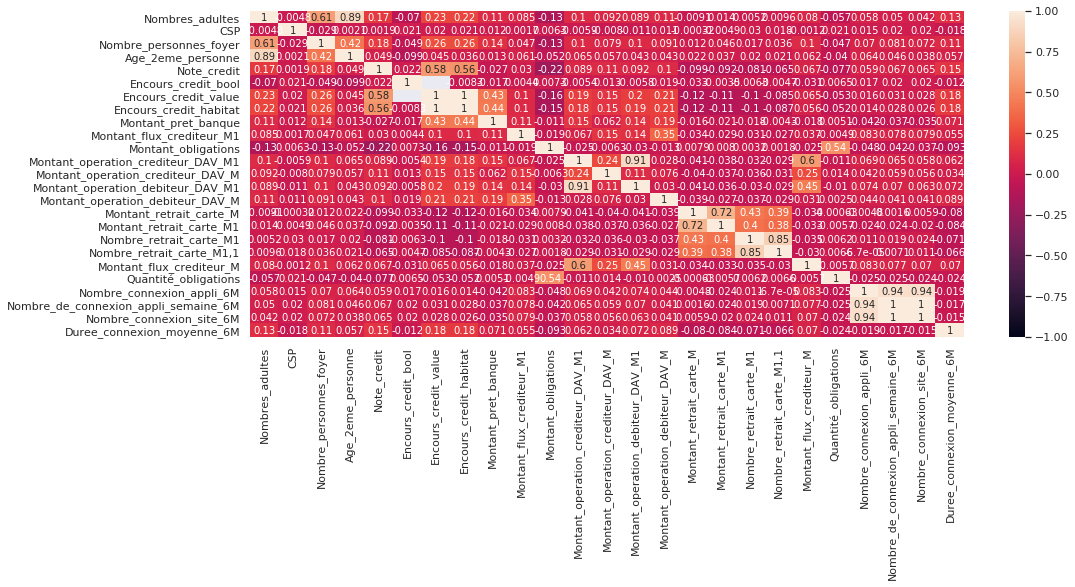

In [575]:
plt.figure(figsize=(16,6))
sns.heatmap(features.corr(),vmin=-1,vmax=1,annot=True)
plt.show()

**Matrice de corrélation**

Ce regroupement par catégories nous permet d'identifier des matrices dans la matrice de corrélation : ce qui traduit le lien entre certaines variables d'une même catégorie.<br>
Certaines catégories sont (faiblement) corrélées entre elles : <br> 
* Informations globales -- Opérations globales

## Analyse de [Output]

### Repartition globale

In [576]:
df.groupby('Output').count()

,ID,Nombres_adultes,Nombre_personnes_foyer,Age_2eme_personne,Note_credit,Encours_credit_bool,Encours_credit_value,ID_PP,Encours_credit_habitat,Montant_flux_crediteur_M1,...,CSP,Nombre_retrait_carte_M1,"Nombre_retrait_carte_M1,1",Quantité_obligations,Nombre_connexion_appli_6M,Nombre_de_connexion_appli_semaine_6M,Nombre_connexion_site_6M,Duree_connexion_moyenne_6M,Montant_flux_crediteur_M,Montant_pret_banque
Output,,,,,,,,,,,,,,,,,,,,,
False,2167,2159,2161,2166,2165,2150,2133,2161,2165,2164,...,2164,2163,2164,2165,2152,2149,2151,2160,2162,2162
True,833,831,830,832,830,829,823,832,831,832,...,831,833,831,829,827,830,830,832,832,832


#### On observe que Output est déséquilibré : 
* 2/3 - 1/3 : False // True

#### Il faudra donc avoir recours à de la cross validation afin d'estimer au mieux la qualité de notre modèle
<br>

### Sens output & lien avec les variables

**Les variables** : Comme nous l'avons vu précedemment, il est possible de regrouper les variables par catégories et celles-ci donnent des informations sur 3 composantes 
* *Informations globales* : Profil du client
* *Information bancaires* : Opérations réalisées par le client 
* *Information Extra-financières* : Assuidité, suivi des comptes bancaires
  
**Output** : 

Cette variable à prédire prend deux valeurs : *VRAI* ou *FAUX* : 
<br> 
Au des variables endogènes on peut supposer les choses suivantes sur Output : 

* Output peut caractériser le fait que le client en question soit en défaut de paiement sur son prêt 
    * Applications : Eviter de prêter de l'argent à des gens à risques
    
* Output peut caractériser le fait que le client en question soit au contraire un "bon client" ou non 
    * Appplications : Idenfifier plus facilement les bons profils

> Afin de mieux comprendre le sens de cette variable nous allons procéder à une exploration "simple" avec des regroupements en fonction de certaines variables

In [577]:
from sklearn.preprocessing import MinMaxScaler
def groupby_output(df,cols,plot=True):
    """Permet de renvoyer la moyenne des variables pour chaque types de variables"""
    all_cols = cols +['Output']
    """Affichage des données (scale pour pouvoir tout afficher sur le même graphe)"""
    # Premier Df qui permet de mener une analyse qualitative en ayant le sens sur les variables
    df1 = df[all_cols].groupby('Output').mean()
    # Scale df et analyser le groupby
    X = df[cols].values
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    df_scaled = pd.concat([pd.DataFrame(X,columns=cols),pd.DataFrame(df['Output'])],axis=1)
    # Group df_scaled
    df2 = df_scaled[all_cols].groupby('Output').mean()
    scaled_cols = df2.columns
    if plot:
        df2.plot.bar()
        plt.legend(bbox_to_anchor=(2,0.5),loc='center right')
        plt.show()
    return(df1)

## Output & Informations globales

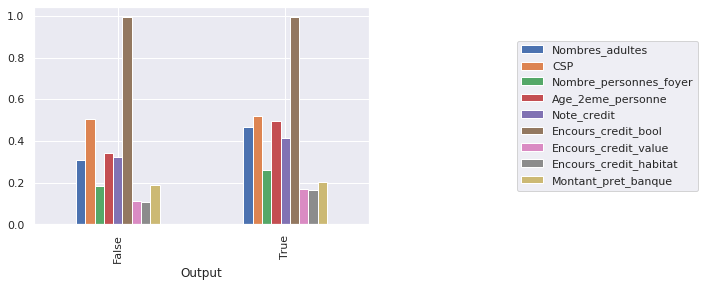

,Nombres_adultes,CSP,Nombre_personnes_foyer,Age_2eme_personne,Note_credit,Encours_credit_bool,Encours_credit_value,Encours_credit_habitat,Montant_pret_banque
Output,,,,,,,,,
False,1.533727,0.506007,1.982359,24.430347,3.698490,0.992093,54909.235507,53749.468068,127473.837470
True,1.869312,0.519856,2.551882,40.206963,5.163276,0.992762,102163.162792,99818.213237,135858.672833


In [578]:
infos_output = groupby_output(df,infos_globales_cols)
# groupby_output(infos_globales_cols)
infos_output

### Lien entre informations globales et output

**On observe que lorsque Output est True :**
* Le profil du client est différent : 
    * Personne en couple (NbAdultes 1.8) ; plus âgé : 40 ans en moyenne
* La note de crédit est meilleure 
* Le montant de l'encours est plus important <br>

**Et donc à l'inverse lorsque Output est False :** 
* Personne plus jeune, seule, ou famille monoparentale 
* Encours moins important & montant de prêt plus faible

*Influence du paramètre CSP :* La classe Socio Professionnelle ne semble pas être un facteur déterminant


In [618]:
df.groupby(['Output','CSP']).count()

ID  Nombres_adultes  Nombre_personnes_foyer  Age_2eme_personne  \
Output CSP                                                                     
False  0.0  1069             1064                    1063               1068   
       1.0  1095             1092                    1095               1095   
True   0.0   399              399                     397                398   
       1.0   432              430                     431                432   

            Note_credit  Encours_credit_bool  Encours_credit_value  ID_PP  \
Output CSP                                                                  
False  0.0         1068                 1062                  1052   1067   
       1.0         1094                 1085                  1078   1091   
True   0.0          397                  397                   393    399   
       1.0          431                  431                   429    431   

            Encours_credit_habitat  Montant_flux_crediteur_M1  ...  \
Output CSP                                                     ...   
False  0.0                    1069                       1066  ...   
       1.0                    1093                       1095  ...   
True   0.0                     397                        398  ...   
       1.0                     432                        432  ...   

            Montant_retrait_carte_M1  Nombre_retrait_carte_M1  \
Output CSP                                                      
False  0.0                      1068                     1067   
       1.0                      1091                     1093   
True   0.0                       398                      399   
       1.0                       431                      432   

            Nombre_retrait_carte_M1,1  Quantité_obligations  \
Output CSP                                                    
False  0.0                       1066                  1069   
       1.0                       1095                  1093   
True   0.0                        398                   395   
       1.0                        431                   432   

            Nombre_connexion_appli_6M  Nombre_de_connexion_appli_semaine_6M  \
Output CSP                                                                    
False  0.0                       1062                                  1060   
       1.0                       1087                                  1086   
True   0.0                        396                                   396   
       1.0                        429                                   432   

            Nombre_connexion_site_6M  Duree_connexion_moyenne_6M  \
Output CSP                                                         
False  0.0                      1062                        1064   
       1.0                      1087                        1093   
True   0.0                       396                         399   
       1.0                       432                         431   

            Montant_flux_crediteur_M  Montant_pret_banque  
Output CSP                                                 
False  0.0                      1067                 1066  
       1.0                      1092                 1093  
True   0.0                       398                  399  
       1.0                       432                  432  

[4 rows x 26 columns]

Je décide donc de ne pas considérer CSP pour les prochaines analyses et pour la modélisation.
> Je l'avais tout d'abord considéré mais mettre CSP de côté améliore la performance des modèles ! 

In [623]:
# features_cols.remove('CSP')

## Output & Informations bancaires

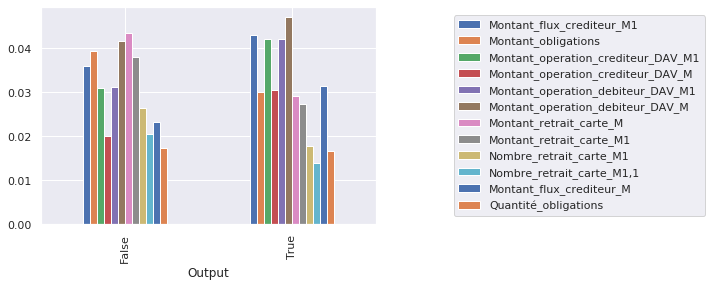

,Montant_flux_crediteur_M1,Montant_obligations,Montant_operation_crediteur_DAV_M1,Montant_operation_crediteur_DAV_M,Montant_operation_debiteur_DAV_M1,Montant_operation_debiteur_DAV_M,Montant_retrait_carte_M,Montant_retrait_carte_M1,Nombre_retrait_carte_M1,"Nombre_retrait_carte_M1,1",Montant_flux_crediteur_M,Quantité_obligations
Output,,,,,,,,,,,,
False,2618.245451,11648.642622,6572.115729,3848.981654,6257.514256,7999.454186,30.690266,32.447625,0.183974,0.193074,3226.527547,167624.961198
True,5580.669150,6229.993193,11868.746673,8786.311920,11344.509192,10501.935343,8.258883,5.931756,0.031241,0.037389,6253.349011,141311.905701


In [579]:
bancaires_output = groupby_output(df,operations_bancaires_cols)
# groupby_output(infos_globales_cols)
bancaires_output

### Lien entre opérations bancaires et output

**On observe que lorsque Output est True :**
* Les montants des flux créditeurs sont plus importants :
    * Ce qui traduit des revenus plus elevés
* Les montants des obligations est plus faible

**Et donc à l'inverse lorsque Output est False :**
* Flux créditeurs moins importants
* Nombre de retraits en cartes plus importants


### Evolution de certaines variables
Il est intéressant de regarder l'évolution de certaines variables : 
* Montant_flux_créditeur (M(-1)->M)
* Montant_operation_crediteur_DAV (M(-1)->M)
* Montant_operation_debiteur_DAV (M(-1)->M)
* Montant_retrait_carte (M(-1)->M)

In [580]:
mois = ['M1','M']
base = ['Montant_flux_crediteur_','Montant_operation_crediteur_DAV_','Montant_operation_debiteur_DAV_']
evolution_cols_bancaire = []
"""Construction des colonnes rapides"""
for b in base :
    for m in mois :
        s = b+m
        evolution_cols_bancaire.append(s)

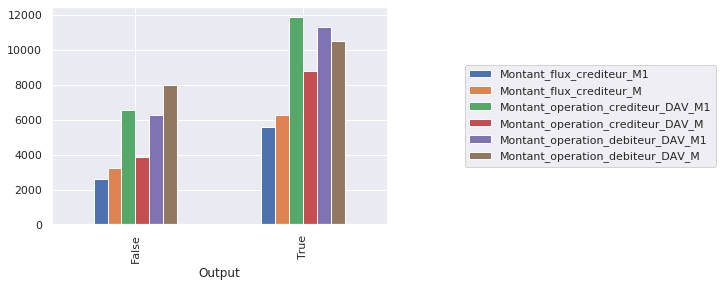

In [581]:
evolution_bancaires_output = groupby_output(df,evolution_cols_bancaire,plot=False)
evolution_bancaires_output.plot.bar()
plt.legend(bbox_to_anchor=(2,0.5),loc='center right')
plt.show()

### Analyse de l'évolution : 

> Rq : Je n'ai pas scale les données de ces variables pour le plot afin de pouvoir comparer des variables deux à deux 

#### Concernant ces variables :

* Montant_flux_créditeur (M(-1)->M)(Bleu & Orange)
* Montant_operation_crediteur_DAV (M(-1)->M) (Vert & Rouge)

Peu importe la valeur de l'Output ces variables évolue de la même façon 
* Montant_flux_créditeur (M(-1)->M)(Bleu & Orange) : **Augmente**
* Montant_operation_crediteur_DAV (M(-1)->M) (Vert & Rouge) : **Diminution**

#### Concernant cette variable on peut discriminer de façon plus pertinente : 

* Montant_operation_debiteur_DAV (M(-1)->M) (Violet & Marron)

| Variable \ Output                     | True  | False    |
| -------------------------- | ----- | -------- |
| Montant Opération Débiteur | Diminue | Augmente |

* Baisse au niveau débiteur pour Output = True, augmentation pour Output = False


## Output & Informations Extra Financières

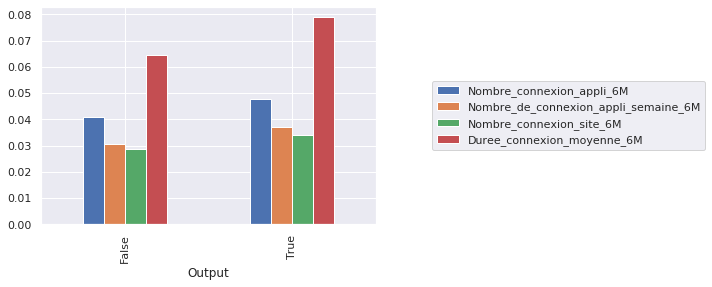

,Nombre_connexion_appli_6M,Nombre_de_connexion_appli_semaine_6M,Nombre_connexion_site_6M,Duree_connexion_moyenne_6M
Output,,,,
False,19.829888,24.388657,30.629056,94.637478
True,25.323693,32.515663,40.371012,124.751721


In [582]:
extra_fi_output = groupby_output(df,extra_financiers_cols)
extra_fi_output

### Lien entre données extrafinancières et output

**On observe que lorsque Output est True :**

Le client est plus assidu : 
* Le nombre de connexion est plus importante, la durée passée sur le site internet est plus importante, et donc le suivi du compte bancaire de meilleure qualité
    
**Et donc à l'inverse lorsque Output est False :**

Le client est moins attentif à sa santé financière
* Celui-ci va passer moins de temps sur le site internet et va être moins assidu 

## Signification d'Output

### Conclusion : 

Au vu du lien entre les opérations bancaires et l'Output, il semble clair que Output fais la distinction entre les clients ayant une bonne santé financière : 
* Moins d'opérations en débit (en proportion), + d'opérations en crédit (en proportion)
* Une plus grande stabilité personnelle (au vu des informations globales)
* Un meilleur suivi de sa situation financière (au vu du lien extrafinanciers - information globales)

# 3. Choix de la modélisation

## Type d'apprentissage et choix des modèles 

#### Apprentissage supervisé

Nous sommes bien ici dans un cas où nous avons des données dont **on connaît la classe d'appartenance**, l'idée étant donc de pouvoir à l'avenir **prédire la classe d'appartenance d'un nouveau client.**

#### Réduire le nombres de variables

Au vu du nombres de variables important (25), il est nécesssaire de **réduire le nombre de variables**, afin de limiter l'erreur du modèle. Une **ACP** va nous permettre de garder un nombre réduit de variables qui expliqueront une grande partie de la variance et donc une grande partie du dataset.


#### Méthodes d'apprentissage supervisé choisie : 

* SVM Classifier 
* Random Forest Classifier 



| Méthodes                | Avantages                                                    | Inconvénients                                                |
| ----------------------- | ------------------------------------------------------------ | ------------------------------------------------------------ |
| Random Forest           | 1. Performant sur la classification <br>2. Capable de manipuler un nombre de features importants <br>3. Permet d'apprhénder des jeux de données non équilibrés | 1. Nécessite une selection précise des hyperparamètres<br>2. "Boîte noire" |
| Support Vecteur Machine | 1. Permet la séparation des classes  grâce à l'utilisation de noyau<br><br>2. Si la séparation est claire (après avoir séparé les classes graĉe au noyau) et <br>donc la marge suffisante. La prédiction est de très bonne qualité. | 1. Nécessite un nombre de variables limitée<br>              |

#### Choix des hyperparamètres :

Au vu des deux modèles que nous avons choisis, il sera nécessaire de choisir les **meilleurs hyperparamètres**. Pour cela il faudra mettre en place une **grille d'expérience.**




## Choix des metrics

Maintenant que nous avons bien compris la signification de l'Output que nous souhaitons prédire, il est pertinent d'envisager le scénario suivant : 

* On souhaite construire un modèle qui détecte les "bons" utilisateurs avec la **meilleure précision possible**, tout en sachant que ceux-ci sont sous représentés.

#### Les metrics intéressantes vont êtres : 

* **Accuracy_score** : Quelle est la précision de notre modèle pour prédire les "bons"
* **Recall** : La fraction des échantillons de la classe qui sont correctement prédits.

#### Evaluation des performances du modèle : 

Il est important de garder à l'esprit que notre **jeu de données est fortement déséquilibré**, et qu'il va donc être nécessaire d'avoir recours à la **cross validation pour estimer correctement sa performance.**

# 4. Analyse en Composante Principale

Au vu du nombre conséquent de variables, il me paraît pertinent de faire une ACP afin de réduire le nombre de variables à utiliser pour le modèle

In [624]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

### Calibrage du dataset 
* X : features 
* y : output

In [625]:
""" J'utilise un MinMaxScaler qui après analyse permet d'augmenter 
la variance expliquée sur les premieres composantes de l'ACP"""
scaler = MinMaxScaler()

#### Il faut enlever les NaN du dataframe 

In [626]:
df_without_na = df.dropna()

In [627]:
print(df_without_na.shape,df.shape,'-- Nombres de lignes en moins:',(df.shape[0]-df_without_na.shape[0]))

(2833, 28) (3008, 28) -- Nombres de lignes en moins: 175


### Mise en place de l'ACP

In [628]:
df_without_na[features_cols].values.shape

(2833, 24)

In [671]:
def make_pca(df_without_na,features_cols):
    # Chargement des features en array numpy et de l'output
    X = df_without_na[features_cols].values
    y = df_without_na['Output'].tolist()
    scaler = MinMaxScaler()
    # Calibrage de X
    X = scaler.fit_transform(X)
    scaled_df_without_na = pd.DataFrame(X,columns=features_cols)
    # Chargement de l'ACP 
    pca = PCA(random_state=0)
    X = pca.fit_transform(X)
    return(pca,X,y,scaled_df_without_na)

In [672]:
pca,X,y,scaled_df_without_na = make_pca(df_without_na,features_cols)

### Analyse de l'ACP

In [631]:
def pca_plot(pca,X):
    # Visualisation de l'inertie en fonction du nombres de composantes
    fig,ax = plt.subplots(figsize=(14,5))
    sns.set(font_scale=1)

    plt.step(range(X.shape[1]),pca.explained_variance_ratio_.cumsum(),where='mid', label="Cumulative explained variance")
    sns.barplot(np.arange(1,X.shape[1]+1),pca.explained_variance_ratio_,alpha=0.5, color ="g",label='Individual explained variance')
    plt.xlim(0,10)
    plt.plot((0,10),(0.95,0.95),label='95% inertia')
    ax.set_xticklabels([s for s in ax.get_xticklabels()])

    plt.xlabel('Principal components')
    plt.ylabel('Explained variance')
    plt.legend()
    plt.show()

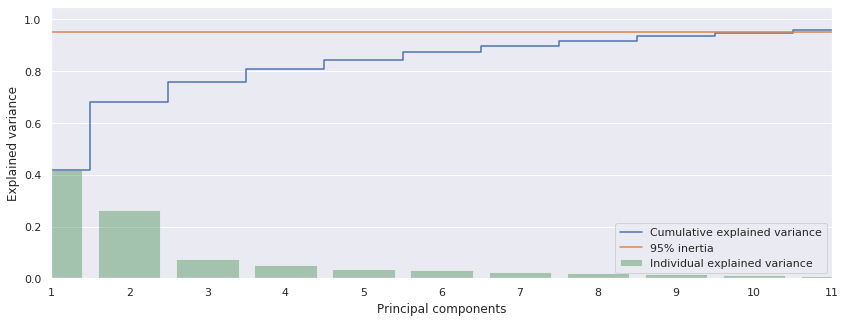

In [632]:
pca_plot(pca,X)

#### On peut garder uniquement les 8 premières composantes qui expliquent 95% de la variance

###  Visualisation de l'ACP

### Corrélation entre les variables et les composantes principales

In [633]:
# Afficher la corrélation entre les variables initiales et les composantes principales
corr_matrix_var_component = pd.concat([scaled_df_without_na,principal_components_df],axis=1).corr()

corr_var_component = corr_matrix_var_component.iloc[len(features_cols):-1,:].transpose().iloc[:len(features_cols),:]

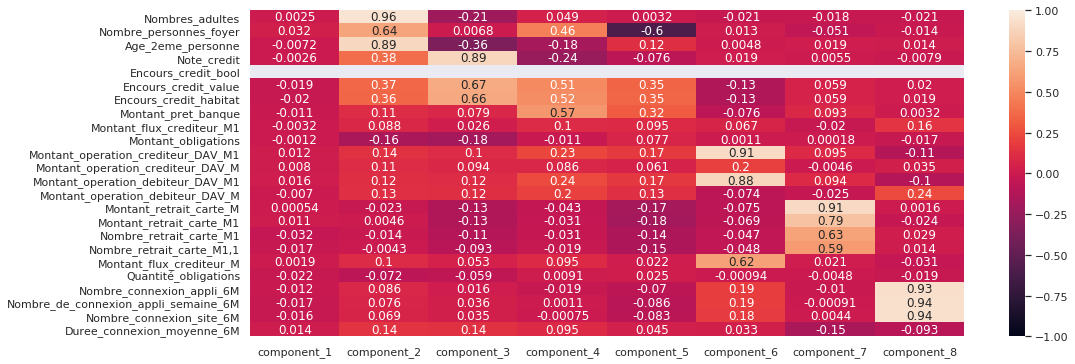

In [634]:
plt.figure(figsize=(16,6))
sns.heatmap(corr_var_component,vmin=-1,vmax=1,annot=True)
plt.show()


### Construction d'un dataframe avec les 8 premières composantes de l'ACP

In [635]:
n_components_pca = 8

In [669]:
def create_ncomponents_df(X,y,n_components_pca=8):
    """Création des colonnes du dataframe"""
    pca_cols = [f'component_{i+1}' for i in range(n_components_pca)]+["Output"]
    principal_components_df = pd.concat([pd.DataFrame(X[:,:n_components_pca]),pd.DataFrame(y)],axis=1)
    principal_components_df.columns = pca_cols
    return(principal_components_df)

In [670]:
principal_components_df = create_ncomponents_df(X,y)
principal_components_df.head()

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,Output
0,0.424057,-0.494354,-0.136317,0.146934,0.006627,0.012465,0.050998,-0.042334,0
1,0.419411,-0.508167,-0.119277,0.146933,-0.013520,-0.016478,-0.006681,-0.062837,0
2,0.367902,-0.506387,-0.153280,0.156422,0.000045,-0.006143,-0.010367,-0.069196,0
3,0.367346,-0.517589,-0.139363,0.134887,-0.028180,0.219480,-0.028046,-0.040031,0
4,0.381369,-0.484162,-0.145638,0.144035,0.001206,-0.012210,-0.016539,-0.065866,0


### Workflow pca :
Workflow pour créer la pca avec juste le df sans NaN et les colonnes.

In [675]:
def workflow_pca(df_without_na,features_cols,n_components_pca=8):
    pca,X,y,scaled_df_without_na = make_pca(df_without_na,features_cols)
    principal_components_df = create_ncomponents_df(X,y,n_components_pca=n_components_pca)
    return(principal_components_df)

### Pair plot

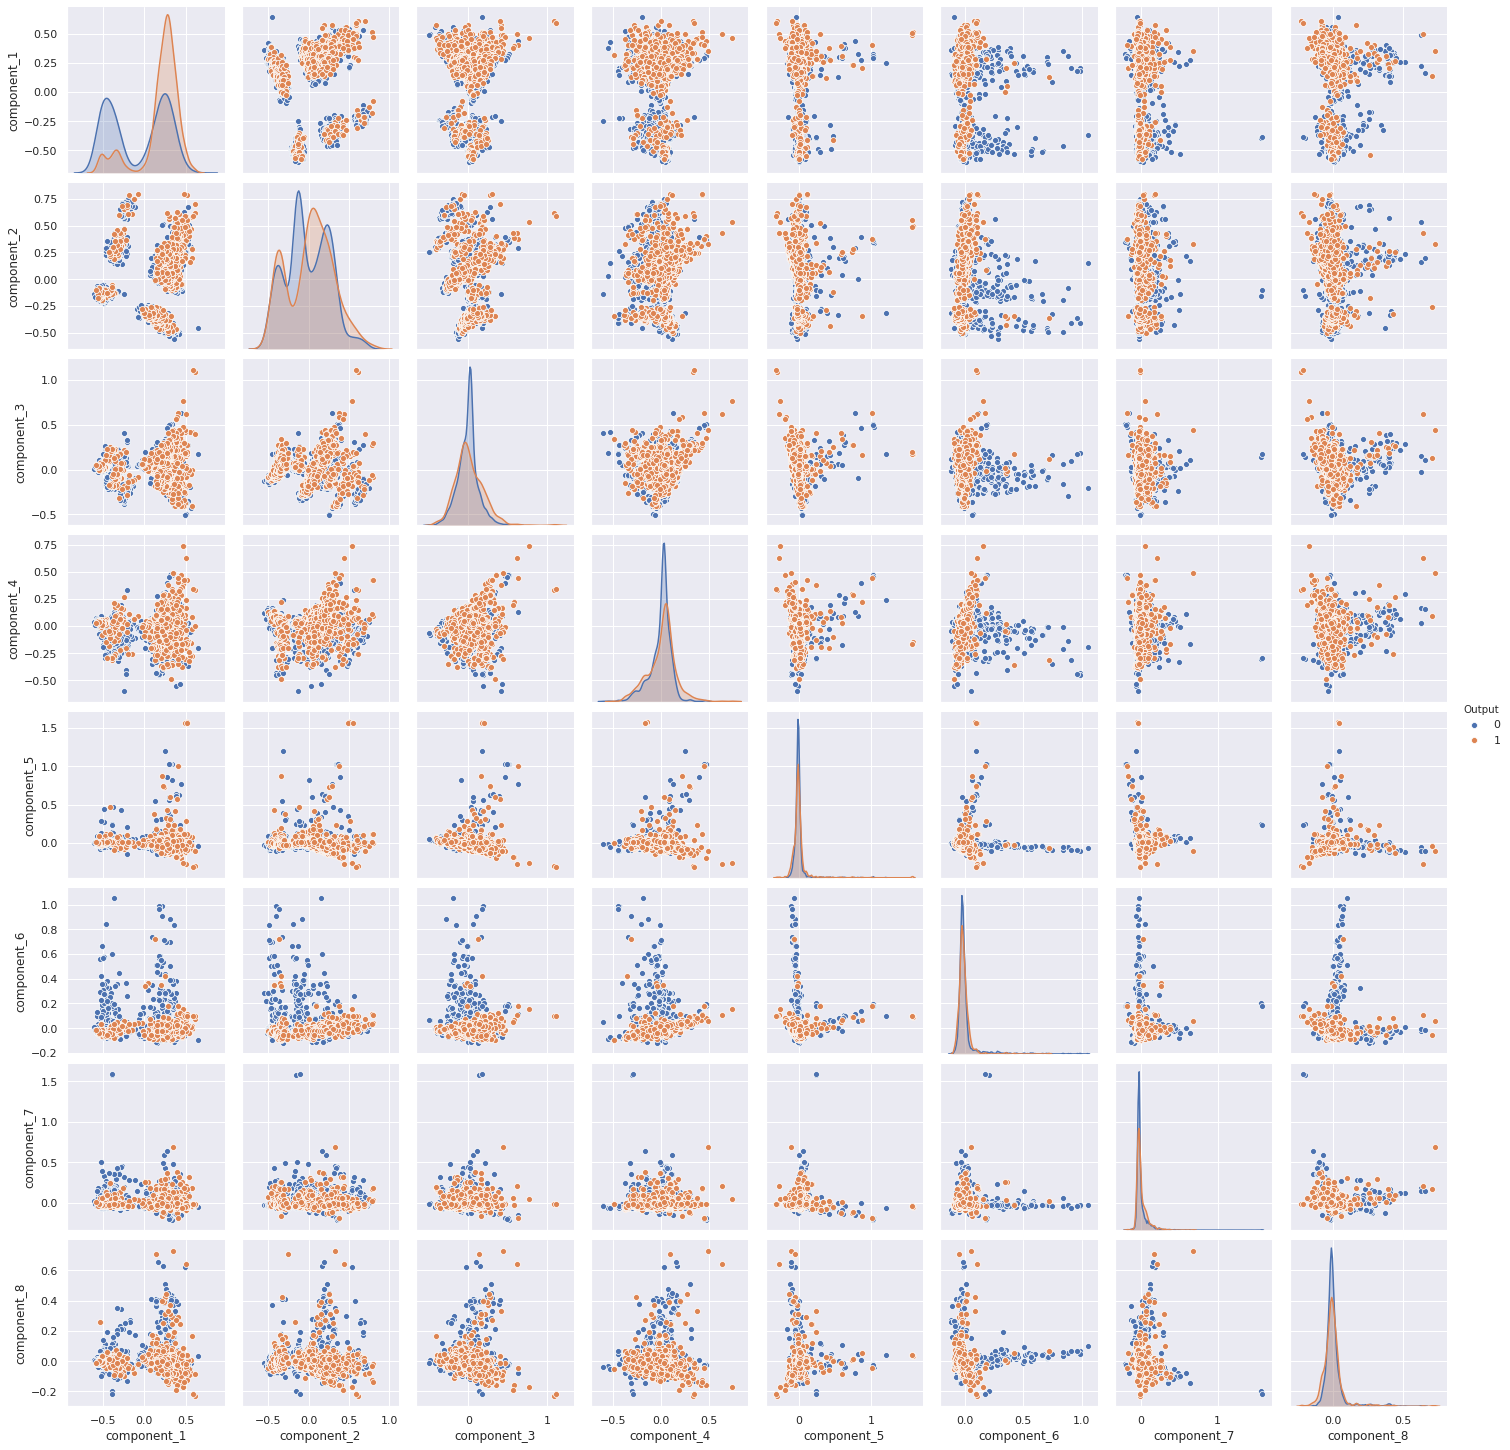

In [638]:
"""Visualisation des plans factoriels de l'ACP"""
sns.pairplot(principal_components_df,hue='Output')
plt.show()

##### On constate qu'il n'y a pas de séparations claires entre les deux classes, ce qui laisse présager que le noyau linéaire de notre SVM ne va pas être performant, et qu'il va falloir envisager d'autres noyaux.
<br>




# 5 - Classification avec un SVC : Support Vector Machine Classifier


In [639]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.model_selection import train_test_split

## 5.1. Selection des features et de Output

In [640]:
def create_features_principal_comp_df(df):
    X = df.iloc[:,:-1].values
    y = [1 if i else 0 for i in df['Output']]
    y = np.array(y)
    return(X,y)

In [641]:
principal_components_df.head(1)

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,Output
0,0.424057,-0.494354,-0.136317,0.146934,0.006627,0.012465,0.050998,-0.042334,0


In [642]:
X,y = create_features_principal_comp_df(principal_components_df)
print(X.shape,y.shape)
# Nous allons pouvoir travailler avec ces arrays pour entraîner notre modèle et l'évaluer
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=42)

(2833, 8) (2833,)


## 5.2. Optimisation des hyperparamètres

In [643]:
"""Initialisation du model"""
svc_model = SVC()

"""Hyperparamètres"""
search_space = {'kernel':['linear','poly','rbf'],'C':uniform(0,10)}
## Trois noyeaux a l'étude 
## 1/C donne la marge de séparation

"""Random Search"""
svc_random = RandomizedSearchCV(model,search_space, n_jobs=-1, cv = 5,n_iter = 20)
## cv = split en 5 parties
## Jobs =-1 : Utilisation de tout le processeur

In [644]:
svc_random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=20, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f36c61cb0d0>,
                                        'kernel': ['linear', 'poly', 'rbf']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [645]:
svc_random.best_params_

{'C': 7.8237789095891745, 'kernel': 'rbf'}

#### Voici donc les meilleurs paramètres pour notre SVC
> **Noyau : RBF** <br>
Comme on pouvait s'y attendre précedemment le noyau choisi est un noyau gaussien qui a donc du séparer les points. 

## 5.3. Performance du modèle

Maintenant que nous avons pu choisir les meilleurs paramètres pour notre modèles nous pouvons évaluer sa performance en utilisant la cross validation

In [646]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [660]:
def cross_validation(model,X,y,scoring='accuracy'):
    """k fold-cross validation"""
    
    # cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
    scores = cross_val_score(model,X,y,scoring=scoring,cv=5)
    accuracy = np.mean(scores)
    return(accuracy)

In [648]:
"""Selection du meilleur modèle"""
best_svc = svc_random.best_estimator_

#### Résultats de la cross validation

In [662]:
cross_validation(best_svc,X_train,y_train,'accuracy')

0.7554054397883113

In [650]:
cross_validation(best_svc,X_train,y_train,'recall')

0.36024891774891776

In [651]:
cross_validation(best_svc,X_train,y_train,'f1')

0.45453167416228724

### Workflow SVC
Refaire rapidement PCA + SCV avec le dataframe et les features_cols

In [ ]:
def workflow_svc(df_without_na,features_cols,n_components_pca=8):
    principal_components_df = workflow_pca(df_without_na,features_cols,n_components_pca)
    X,y = create_features_principal_comp_df(principal_components_df)
    
    

# 6. Classification avec un Random Forest
## 6.1. Selection des features et de output

In [652]:
X,y = create_features_principal_comp_df(principal_components_df)
print(X.shape,y.shape)
# Nous allons pouvoir travailler avec ces arrays pour entraîner notre modèle et l'évaluer
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=42)

(2833, 8) (2833,)


## 6.2. Optimisation des hyperparamètres

In [653]:
from sklearn.ensemble import RandomForestClassifier

In [654]:
# Nombres d'arbres dans le random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
# Nombre de features ) considérer à chaque split
max_features = ['auto', 'sqrt']
# Profondeur maximal de chaque arbre
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Nombre minimum d'échantillons requis pour diviser un nœud
min_samples_split = [2, 5, 10]
# Nombre minimum d'échantillons requis à chaque nœud
min_samples_leaf = [1, 2, 4]
# Avec ou Sans bootstrap
bootstrap = [True, False]

In [655]:
## Création de la grille
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [656]:
%%time
## Creation du modèle
rfc = RandomForestClassifier()

"""De nouveau RandomizedSearchCV"""
rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   28.5s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  2.2min finished


CPU times: user 4.2 s, sys: 28 ms, total: 4.23 s
Wall time: 2min 13s


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

## 6.3. Performance du modèle

In [657]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 90,
 'bootstrap': True}

In [658]:
best_rf = rf_random.best_estimator_

In [663]:
cross_validation(best_rf,X_train,y_train,'accuracy')

0.7650039437193089

In [664]:
cross_validation(best_rf,X_train,y_train,'recall')

0.40791505791505794

In [665]:
cross_validation(best_rf,X_train,y_train,'f1')

0.49264264049376755

# Conclusion